In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
#import data
#import headers from .names file
df = pd.read_csv('kr-vs-kp.data', header=None)
X=df.iloc[:,:36]
y=df.iloc[:,36]
df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3192,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3193,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3194,t,f,t,f,f,f,t,f,f,f,...,f,t,f,f,t,f,f,f,n,nowin


In [20]:
# Ignore the class labels and perform Clustering.
df.isnull().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
dtype: int64

In [21]:
#encode the class labels
from sklearn.preprocessing import LabelEncoder
leY = LabelEncoder()
y = leY.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [26]:
#encode values in X
leX = LabelEncoder()
for col in X.columns.values:
    X[col] = leX.fit_transform(X[col])
X

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
1606,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2346,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
461,0,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,1,0
480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
835,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1653,0,0,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,1,1,0
2607,0,0,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,1,0,1,0


In [27]:
#shuffle the data
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=0)

In [28]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
# do Agglomerative Clustering
def agg(X_test, clusters=2, doPrint=True):
  from sklearn.cluster import AgglomerativeClustering
  agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
  agg.fit(X_train)

  # predict the test set
  y_pred = agg.fit_predict(X_test)

  # evaluate the model
  from sklearn.metrics import accuracy_score
  if doPrint:
    print(accuracy_score(y_test, y_pred))
  # return predictions
  y_pred=agg.fit_predict(X_test)
  return y_pred

In [52]:
# do K-Means Clustering
def kmeans(X_test, clusters=2, doPrint=True):
  from sklearn.cluster import KMeans
  kmeans = KMeans(n_clusters=2, random_state=0)
  kmeans.fit(X_train)

  # predict the test set
  y_pred = kmeans.fit_predict(X_test)

  # evaluate the model
  from sklearn.metrics import accuracy_score
  if doPrint:
    print(accuracy_score(y_test, y_pred))
  # return predictions
  y_pred = kmeans.fit_predict(X_test)
  return y_pred

In [53]:
# do with n=2,3,4,5
for i in range(2,6):
  print("Kmeans with n =",i)
  kmeans(X_test,i)
  print("Agglomerative with n =",i)
  agg(X_test,i)

Kmeans with n = 2
0.49375
Agglomerative with n = 2
0.4515625
Kmeans with n = 3
0.49375
Agglomerative with n = 3
0.4515625
Kmeans with n = 4
0.49375
Agglomerative with n = 4
0.4515625
Kmeans with n = 5
0.49375
Agglomerative with n = 5
0.4515625


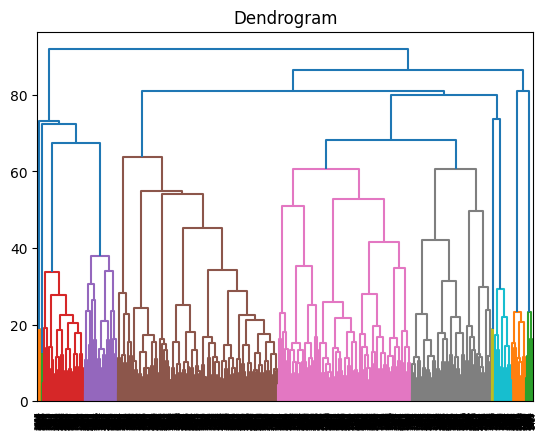

In [45]:
# plotting dendrogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Dendrogram')
plt.show()

In [54]:
# Check and compare the performance with ground truth using Rand Index (RI) and Adjusted Rand Index (RAI) metrics.
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import rand_score
for i in range(2,6):
  print("Kmeans with n =",i)
  print("\tARI:",adjusted_rand_score(y_test, kmeans(X_test,i,False)))
  print("\tRI:",rand_score(y_test, kmeans(X_test,i,False)))
  print("Agglomerative with n =",i)
  print("\tARI:",adjusted_rand_score(y_test, agg(X_test,i,False)))
  print("\tRI:",rand_score(y_test, agg(X_test,i,False)))

Kmeans with n = 2
	ARI: -0.00132452695642946
	RI: 0.4992957746478873
Agglomerative with n = 2
	ARI: 0.007832508093416053
	RI: 0.5039172535211267
Kmeans with n = 3
	ARI: -0.00132452695642946
	RI: 0.4992957746478873
Agglomerative with n = 3
	ARI: 0.007832508093416053
	RI: 0.5039172535211267
Kmeans with n = 4
	ARI: -0.00132452695642946
	RI: 0.4992957746478873
Agglomerative with n = 4
	ARI: 0.007832508093416053
	RI: 0.5039172535211267
Kmeans with n = 5
	ARI: -0.00132452695642946
	RI: 0.4992957746478873
Agglomerative with n = 5
	ARI: 0.007832508093416053
	RI: 0.5039172535211267
